# Climate Coding Challenge

Climate change is impacting the way people live around the world

## There are more Earth Observation data online than any one person could ever look at

[NASA’s Earth Observing System Data and Information System (EOSDIS)
alone manages over 9PB of
data](https://www.earthdata.nasa.gov/learn/articles/getting-petabytes-people-how-eosdis-facilitates-earth-observing-data-discovery-and-use).
1 PB is roughly 100 times the entire Library of Congress (a good
approximation of all the books available in the US). It’s all available
to **you** once you learn how to download what you want.

Here we’re using the NOAA National Centers for Environmental Information
(NCEI) [Access Data
Service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation)
application progamming interface (API) to request data from their web
servers. We will be using data collected as part of the Global
Historical Climatology Network daily (GHCNd) from their [Climate Data
Online library](https://www.ncdc.noaa.gov/cdo-web/datasets) program at
NOAA.

For this example we’re requesting [daily summary data in Karachi,
Pakistan (station ID
PKM00041780)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:PKM00041780/detail).

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-response"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Research and cite your data</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Research the <a
href="https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html"><strong>Global
Historical Climatology Network - Daily</strong></a> data source.</li>
<li>In the cell below, write a 2-3 sentence description of the data
source.</li>
<li>Include a citation of the data (<strong>HINT:</strong> See the ‘Data
Citation’ tab on the GHCNd overview page).</li>
</ol>
<p>Your description should include:</p>
<ul>
<li>who takes the data</li>
<li>where the data were taken</li>
<li>what the maximum temperature units are</li>
<li>how the data are collected</li>
</ul></div></div>

**YOUR DATA DESCRIPTION AND CITATION HERE** 🛎️

## Access NCEI GHCNd Data from the internet using its API 🖥️ 📡 🖥️

The cell below contains the URL for the data you will use in this part
of the notebook. We created this URL by generating what is called an
**API endpoint** using the NCEI [API
documentation](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation).

> **What’s an API?**
>
> An **application programming interface** (API) is a way for two or
> more computer programs or components to communicate with each other.
> It is a type of software interface, offering a service to other pieces
> of software ([Wikipedia](https://en.wikipedia.org/wiki/API)).

First things first – you will need to import the `earthpy` library to
help with data management and the `pandas` library to work with tabular
data:

In [1]:
# Import required packages
import holoviews as hv
import hvplot.pandas
import pandas as pd
import earthpy
hv.extension('bokeh')

The cell below contains the URL you will use to download climate data.
There are two things to notice about the URL code:

1.  It is surrounded by quotes – that means Python will interpret it as
    a `string`, or text, type, which makes sense for a URL.
2.  The URL is too long to display as one line on most screens. We’ve
    put parentheses around it so that we can easily split it into
    multiple lines by writing two strings – one on each line.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Format your URL for readability</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Pick an expressive variable name for the URL.</li>
<li>Reformat the URL so that it adheres to the <a
href="https://peps.python.org/pep-0008/#maximum-line-length">79-character
PEP-8 line limit</a>, and so that it is <strong>easy to read</strong>.
If you are using GitHub Codespaces, you should see two vertical lines in
each cell – don’t let your code go past the second line.</li>
<li>Replace ‘DATATYPE’, ‘STATION’, and the start and end dates
‘YYYY-MM-DD’, with the values for the data you want to download.</li>
</ol></div></div>

In [2]:
# Access two Snake River Plain weather stations:
#  Mountain Home AFB and Glenn's Ferry
srp_api = ('https://www.ncei.noaa.gov/access/services/data/v1?'
           'dataset=daily-summaries&'
           'stations=USW00024106,USC00103631&'
           'startDate=1970-01-01&'
           'endDate=2025-07-22&'
           'dataTypes=TMIN,TMAX&'
           'units=standard')
srp_api

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00024106,USC00103631&startDate=1970-01-01&endDate=2025-07-22&dataTypes=TMIN,TMAX&units=standard'

## Download and get started working with NCEI data

Go ahead and use `earthpy` to download data from your API URL. You could
also use Python, but using earthpy saves a file and lets you work
offline later on. If you didn’t already, you should import the `earthpy`
library **at the top of this notebook** so that others who want to use
your code can find it easily.

In [3]:
# Download the climate data
climate_df = pd.read_csv(
    srp_api,
    index_col = 'DATE',
    parse_dates = True,
    na_values = ['NaN']
)

# Check that the download worked
climate_df.head()

,STATION,TMAX,TMIN
DATE,,,
1970-01-01,USW00024106,31.0,11.0
1970-01-02,USW00024106,36.0,14.0
1970-01-03,USW00024106,36.0,16.0
1970-01-04,USW00024106,25.0,11.0
1970-01-05,USW00024106,30.0,15.0


In [4]:
# Check that the data was imported into a pandas DataFrame
type(climate_df)

pandas.core.frame.DataFrame

In [5]:
# Remove unnecessary columns
climate_df = climate_df[['TMIN', 'TMAX']]
climate_df

,TMIN,TMAX
DATE,,
1970-01-01,11.0,31.0
1970-01-02,14.0,36.0
1970-01-03,16.0,36.0
1970-01-04,11.0,25.0
1970-01-05,15.0,30.0
...,...,...
2025-07-08,53.0,105.0
2025-07-10,63.0,90.0
2025-07-11,62.0,92.0


In [6]:
# Rename columns to specify fahrenheit
climate_df_fahr = climate_df.rename(columns={
    'TMIN': 'TMIN_F',
    'TMAX': 'TMAX_F'
})

climate_df_fahr

,TMIN_F,TMAX_F
DATE,,
1970-01-01,11.0,31.0
1970-01-02,14.0,36.0
1970-01-03,16.0,36.0
1970-01-04,11.0,25.0
1970-01-05,15.0,30.0
...,...,...
2025-07-08,53.0,105.0
2025-07-10,63.0,90.0
2025-07-11,62.0,92.0


In [ ]:
# Add a column with the temperature in Celsius
# Don't actually run this: it messes up the graph
#climate_df_fahr['TMIN_C'] = (climate_df_fahr['TMIN_F']-32)*(5/9)
#climate_df_fahr['TMAX_C'] = (climate_df_fahr['TMAX_F']-32)*(5/9)
#climate_df_fahr

In [7]:
# Deal with the outlier
climate_df_fahr.sort_values(by='TMIN_F', ascending=True, na_position='first')
# It's only values in 1969. Re-download data from 1970 and later

,TMIN_F,TMAX_F
DATE,,
2011-12-28,NaN,NaN
2012-03-25,NaN,NaN
2012-04-12,NaN,NaN
2012-10-24,NaN,NaN
2012-12-04,NaN,NaN
...,...,...
2014-07-28,76.0,98.0
2003-06-29,76.0,88.0
2015-06-29,77.0,107.0


<Axes: title={'center': 'Temperature in Snake River Plain'}, xlabel='Date', ylabel='Temperature (F)'>

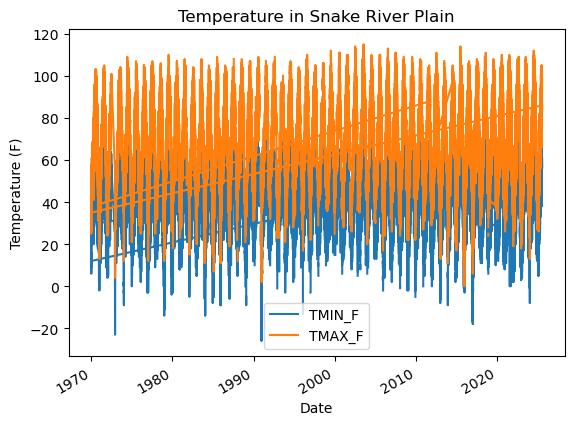

In [8]:
# Plot the data using .plot
climate_df_fahr.plot(
    title='Temperature in Snake River Plain',
    xlabel='Date',
    ylabel='Temperature (F)')


In [9]:
# Resample temperature so there are fewer data points
ann_climate_df = climate_df_fahr.resample('YS').mean()
ann_climate_df

,TMIN_F,TMAX_F
DATE,,
1970-01-01,38.676754,65.115543
1971-01-01,37.410405,66.623563
1972-01-01,32.201878,59.605634
1973-01-01,35.865132,66.628289
1974-01-01,35.587912,67.336986
1975-01-01,35.923077,64.200549
1976-01-01,32.927374,65.748634
1977-01-01,35.931129,67.517906
1978-01-01,35.621918,66.209366


<Axes: title={'center': 'Temperature in the Snake River Plain, Idaho'}, xlabel='Date', ylabel='Temperature (F)'>

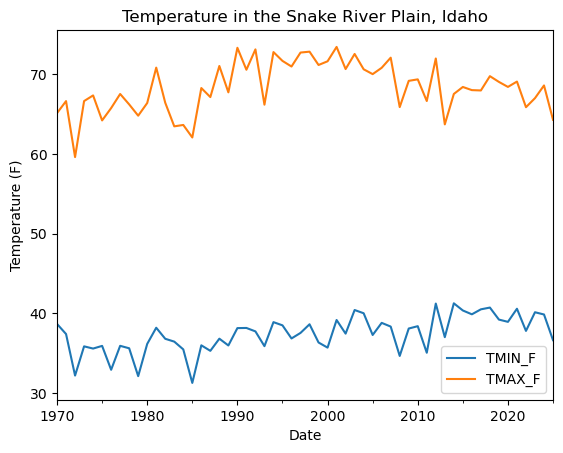

In [10]:
# Plot the annual data
ann_climate_df.plot(
    title='Temperature in the Snake River Plain, Idaho',
    xlabel='Date',
    ylabel='Temperature (F)'
)

In [ ]:
# Plot the annual data interactively
ann_climate_plot = ann_climate_df.hvplot(
    title='Mean Annual Temperature in the Snake River Plain, Idaho',
    xlabel='Date',
    ylabel='Temperature (F)',
    height = 400,
    width = 600,
    legend = "bottom_right")
ann_climate_plot

:NdOverlay   [Variable]
   :Curve   [DATE]   (value)

In [11]:
# Use HV Curve to move the legend to the middle
# Doesn't work: can't offset a legend inside the plot.
# Alternate solution: extend the y-axis so the legend fits below TMIN
srp_title = 'Snake River Plain Mean Annual Min/Max Temperatures'
min_curve = hv.Curve(ann_climate_df['TMIN_F'], label = 'Min Temp')
max_curve = hv.Curve(ann_climate_df['TMAX_F'], label = 'Max Temp')

temp_curve = min_curve*max_curve.opts(width=600, height=400,
                                       title=srp_title)
temp_curve.opts(ylabel='Temperature (F)', legend_position='bottom_right',
                ylim = (20,None))
temp_curve



:Overlay
   .Curve.Min_Temp :Curve   [DATE]   (TMIN_F)
   .Curve.Max_Temp :Curve   [DATE]   (TMAX_F)

In [12]:
# Save the plot (which is technically an overlay)
hv.save(temp_curve, 'SRP_climate_plot.html')

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [51]:
%store temp_curve ann_climate_df

Stored 'temp_curve' (Overlay)
Stored 'ann_climate_df' (DataFrame)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!